# 머신러닝 2일차 과제

### Linear Regression 구현

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 생성
data = {'year' : [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017, 2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
'month' : [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
'interest_rate' : [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
'unemployment_rate' : [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
'index_price' : [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]}

df = pd.DataFrame(data)

df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [2]:
# 라이브러리 import
import matplotlib.pyplot as plt
import	platform

# 시스템별 한글 폰트 설정
if	platform.system()	==	'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system()	==	'Darwin':	#	MacOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='AppleGothic')

In [3]:
import numpy as np

data_ir = np.array(df['interest_rate'])
data_ur = np.array(df['unemployment_rate'])
data_ip = np.array(df['index_price'])

#####  1.1 선형 회귀 : 이자율과 물가지수 상관계수

In [4]:
# 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data_ir, data_ip, random_state=42)


In [5]:
# 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [6]:
# 데이터 준비
from sklearn.linear_model import LinearRegression

# 모델 생성
lr = LinearRegression()
# 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [7]:
min(train_input), max(train_input)

(array([1.75]), array([2.5]))

<function matplotlib.pyplot.show(close=None, block=None)>

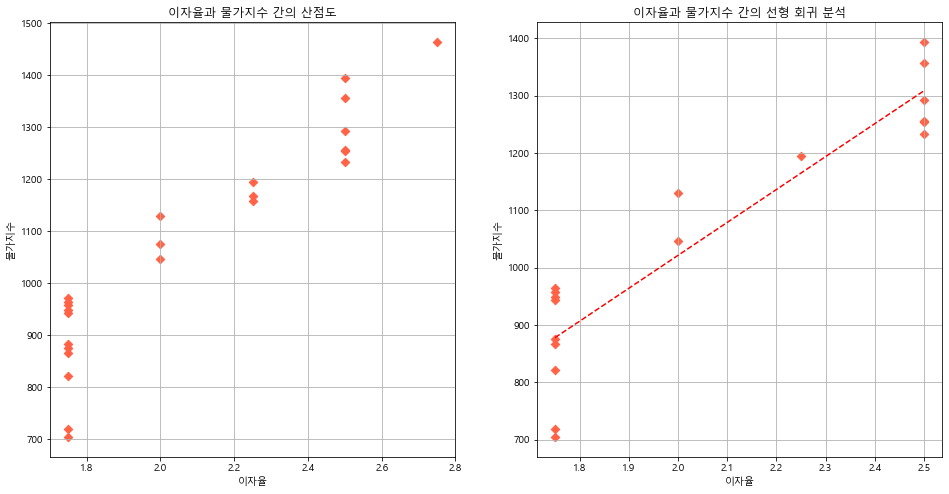

In [8]:
# 이자율, 물가지수 산점도
plt.figure(figsize = (16,8))

plt.subplot(121)
plt.scatter(data_ir, data_ip, color = 'tomato', marker='D')
plt.title('이자율과 물가지수 간의 산점도')
plt.xlabel('이자율')
plt.ylabel('물가지수')
plt.grid(True)

plt.subplot(122)
plt.scatter(train_input, train_target, color = 'tomato', marker='D')
plt.plot([1.75, 2.5], [1.75*lr.coef_ + lr.intercept_, 2.5*lr.coef_ + lr.intercept_], color = 'red', linestyle='--')
plt.title('이자율과 물가지수 간의 선형 회귀 분석')
plt.xlabel('이자율')
plt.ylabel('물가지수')
plt.grid(True)
plt.show

In [9]:
# 기울기와 절편 표시
print(f'이자율과 물가지수 간의 선형 회귀의 기울기 : {lr.coef_}, 절편 : {lr.intercept_}.')

이자율과 물가지수 간의 선형 회귀의 기울기 : [574.45637584], 절편 : -127.38255033557084.


In [10]:
# 모델 평가
print('훈련 데이터 평가 :', lr.score(train_input, train_target))
print('테스트 데이터 평가 :', lr.score(test_input, test_target))

훈련 데이터 평가 : 0.8541859618501457
테스트 데이터 평가 : 0.941892392945057


#####  1.2 다항 회귀 : 이자율과 물가지수 상관계수

In [11]:
# 이자율을 제곱한 데이터를 훈련 세트에 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [12]:
# 선형 회귀 모델 재훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 새로운 각 항의 계수와 절편 구하기
print(lr.coef_, lr.intercept_)

[-524.84946237 2802.42473118] -2429.1028225806517


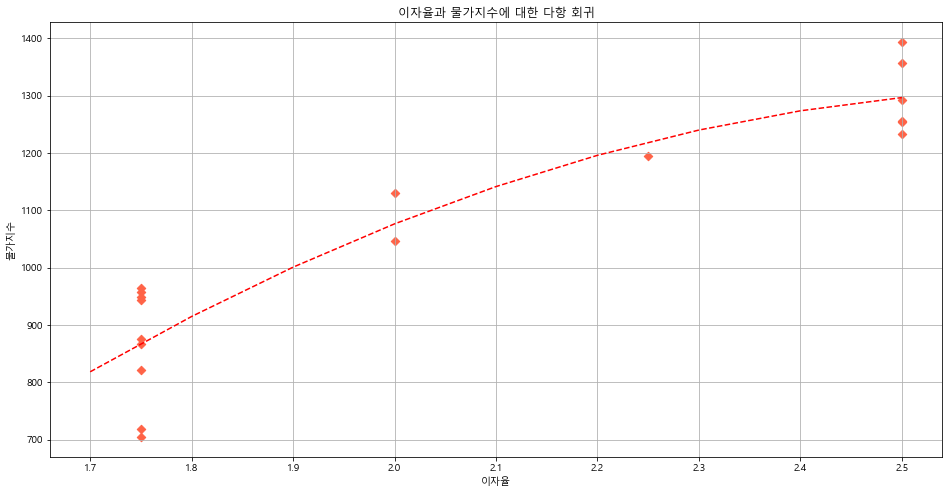

In [13]:
# 다항 회귀식을 이요한 그래프 그리기

# 직선을 위한 수 배열
point = np.arange(1.7, 2.6, 0.1)

plt.figure(figsize = (16, 8))
plt.scatter(train_input, train_target, color = 'tomato', marker = 'D')
plt.plot(point, -524.8 * point ** 2 + 2802.4 * point - 2429.1, color ='red', linestyle = '--')
plt.title('이자율과 물가지수에 대한 다항 회귀')
plt.xlabel('이자율')
plt.ylabel('물가지수')
plt.grid(True)
plt.show()

In [14]:
print('이자율과 물가지수 다항 회귀')
print(f'다항 회귀 coef_ : {lr.coef_}, intercept_ : {lr.intercept_}')

이자율과 물가지수 다항 회귀
다항 회귀 coef_ : [-524.84946237 2802.42473118], intercept_ : -2429.1028225806517


In [15]:
print('다항 회귀 train data score :', lr.score(train_poly, train_target))
print('다항 회귀 test data score :', lr.score(test_poly, test_target))

다항 회귀 train data score : 0.8676269364555872
다항 회귀 test data score : 0.7945265214367343


### 2 실업률과 물가지수 선형 분석

In [16]:
# 훈련 데이터와 테스트 데이터로 구분
data_ur = np.array(df['unemployment_rate'])
data_ip = np.array(df['index_price'])

train_input_02, train_target_02, test_input_02, test_target_02 = train_test_split(
    data_ur, data_ip, random_state= 42
)